In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
fashion_mnist = keras.datasets.fashion_mnist
cifar10=keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
#create the validation set
X_valid, X_train = X_train_full[:6000] / 255.0, X_train_full[6000:] / 255.0
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
#add label for class
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"
]

In [2]:
kinit='glorot_normal'
lr=0.001
dr=0.1
#a convolutional neural network described in Ch. 14, p. 447.
model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu",kernel_initializer=kinit, padding="same",
                            input_shape=[32, 32, 3]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu",kernel_initializer=kinit),
        keras.layers.Dropout(dr),
        keras.layers.Dense(64, activation="relu",kernel_initializer=kinit),
        keras.layers.Dropout(dr),
        keras.layers.Dense(10, activation="softmax")
])
opt=keras.optimizers.Adam(learning_rate=lr)

model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


/Users/caroldong/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-14 09:30:09.842561: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-14 09:30:09.842584: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-14 09:30:09.842589: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-14 09:30:09.842605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-14 09:30:09.842615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc

Epoch 1/30


2024-11-14 09:30:12.139397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1375/1375 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.2052 - loss: 2.0824 - val_accuracy: 0.4320 - val_loss: 1.5520
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.4619 - loss: 1.4773 - val_accuracy: 0.5380 - val_loss: 1.2815
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.5417 - loss: 1.2810 - val_accuracy: 0.5935 - val_loss: 1.1470
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6060 - loss: 1.1171 - val_accuracy: 0.6338 - val_loss: 1.0670
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6547 - loss: 0.9852 - val_accuracy: 0.6512 - val_loss: 1.0224
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6939 - loss: 0.8782 - val_accuracy: 0.6563 - val_loss: 0.9927
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7316 - loss: 0.7661 - val_accuracy: 0.6688 - val_loss: 0.9723
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7619 - loss: 0.68

(0.0, 1.0)

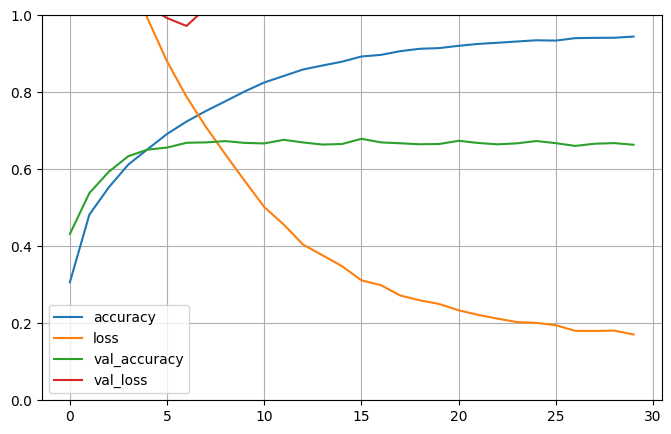

In [3]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [4]:
model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)# get prediction probabilities
print(y_proba.round(2))

y_pred = np.argmax(y_proba, axis=-1) # get predicted class index by finding the index of maximum probability along the last axis
print(np.array(class_names)[y_pred])
print(np.array(class_names)[y_test[:3]])
#The predict_classes method was deprecated in TensorFlow 2.6 and has been removed in later versions.
#Instead, you should use model.predict followed by np.argmax to get the predicted class indices.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5309 - loss: 461.5630
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
['dog' 'ship' 'truck']
[['cat']
 ['ship']
 ['ship']]


In [5]:
kinit='glorot_uniform'
lr=0.001
dr=0.1
#a convolutional neural network described in Ch. 14, p. 447.
model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu",kernel_initializer=kinit, padding="same",
                            input_shape=[32, 32, 3]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu",kernel_initializer=kinit),
        keras.layers.Dropout(dr),
        keras.layers.Dense(64, activation="relu",kernel_initializer=kinit),
        keras.layers.Dropout(dr),
        keras.layers.Dense(10, activation="softmax")
])
opt=keras.optimizers.Adam(learning_rate=lr)

model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


/Users/caroldong/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.2527 - loss: 1.9800 - val_accuracy: 0.4625 - val_loss: 1.4793
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.4645 - loss: 1.4651 - val_accuracy: 0.5382 - val_loss: 1.3037
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5516 - loss: 1.2541 - val_accuracy: 0.6078 - val_loss: 1.1219
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.6196 - loss: 1.0715 - val_accuracy: 0.6338 - val_loss: 1.0595
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.6777 - loss: 0.9181 - val_accuracy: 0.6503 - val_loss: 1.0471
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7138 - loss: 0.8135 - val_accuracy: 0.6478 - val_loss: 1.0510
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7499 - loss: 0.7150 - val_accuracy: 0.6787 - val_loss: 0.9429
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.7827 -

(0.0, 1.0)

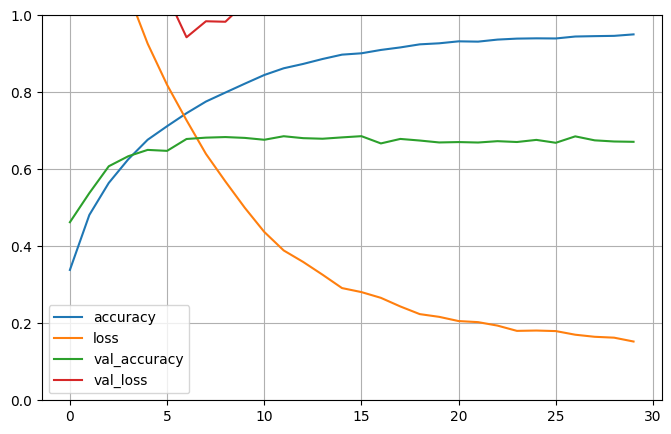

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [7]:
model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)# get prediction probabilities
print(y_proba.round(2))

y_pred = np.argmax(y_proba, axis=-1) # get predicted class index by finding the index of maximum probability along the last axis
print(np.array(class_names)[y_pred])
print(np.array(class_names)[y_test[:3]])
#The predict_classes method was deprecated in TensorFlow 2.6 and has been removed in later versions.
#Instead, you should use model.predict followed by np.argmax to get the predicted class indices.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5026 - loss: 453.7460
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
['cat' 'ship' 'ship']
[['cat']
 ['ship']
 ['ship']]


In [8]:
kinit='he_uniform'
lr=0.001
dr=0.1
#a convolutional neural network described in Ch. 14, p. 447.
model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu",kernel_initializer=kinit, padding="same",
                            input_shape=[32, 32,3]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer=kinit, padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu",kernel_initializer=kinit),
        keras.layers.Dropout(dr),
        keras.layers.Dense(64, activation="relu",kernel_initializer=kinit),
        keras.layers.Dropout(dr),
        keras.layers.Dense(10, activation="softmax")
])
opt=keras.optimizers.Adam(learning_rate=lr)

model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


/Users/caroldong/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.3149 - loss: 1.8372 - val_accuracy: 0.5305 - val_loss: 1.3117
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.5469 - loss: 1.2736 - val_accuracy: 0.6277 - val_loss: 1.0631
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.6426 - loss: 1.0196 - val_accuracy: 0.6767 - val_loss: 0.9493
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7010 - loss: 0.8597 - val_accuracy: 0.6697 - val_loss: 0.9730
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7454 - loss: 0.7405 - val_accuracy: 0.7103 - val_loss: 0.8589
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7777 - loss: 0.6405 - val_accuracy: 0.7103 - val_loss: 0.8640
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8131 - loss: 0.5360 - val_accuracy: 0.7198 - val_loss: 0.8740
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8432 -

(0.0, 1.0)

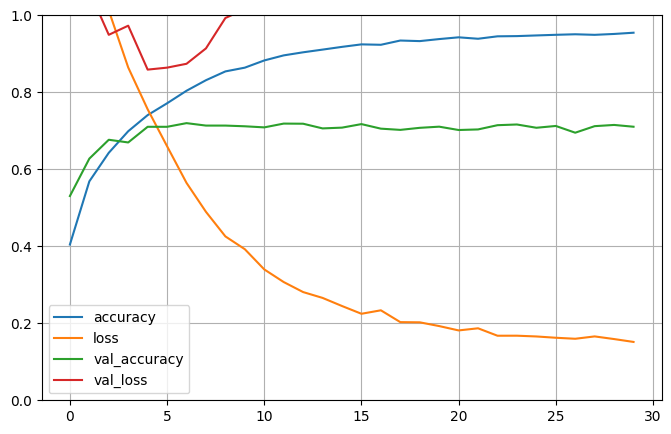

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [10]:
model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)# get prediction probabilities
print(y_proba.round(2))

y_pred = np.argmax(y_proba, axis=-1) # get predicted class index by finding the index of maximum probability along the last axis
print(np.array(class_names)[y_pred])
print(np.array(class_names)[y_test[:3]])
#The predict_classes method was deprecated in TensorFlow 2.6 and has been removed in later versions.
#Instead, you should use model.predict followed by np.argmax to get the predicted class indices.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6185 - loss: 393.4829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
['cat' 'ship' 'ship']
[['cat']
 ['ship']
 ['ship']]
